In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls "/content/drive/My Drive/paper2_data/2017"

task1-Development.xml  task1-Test.xml  task1-Training.xml


In [0]:
!pip install fastai==0.7.0

In [0]:
!pip install torchtext==0.2.3

In [0]:
# !python

In [0]:
# !pip install torch==0.4.1

In [0]:
import sys
sys.path.append("../..")
from fastai.text import *
import html
import json

In [0]:
BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

#DRIVE_FOLDER = Path('drive/')
DATA_PATH=Path('/content/drive/My Drive/paper2_data/')


WIKILM_PATH=Path('/content/drive/My Drive/paper2_data/languaje_model_data/Wiki_LM/')

TASSLM_PATH=Path('/content/drive/My Drive/paper2_data/languaje_model_data/')

PREPROCESED_DATASET_FOLDER = Path('/content/drive/My Drive/paper2_data/pre_processed_dataset/')

## Pre-Procesamiento 

Load GeneralTASS Corpus Dataset

In [0]:
import xml.etree.ElementTree as ET

#TASS_DATA_PATH = Path(DATA_PATH/'generalTASS')
#TRN_PATH = TASS_DATA_PATH/'trn'
e = ET.parse(DATA_PATH/'general-train-tagged-3l.xml')
root = e.getroot()

# e_test = ET.parse(DATA_PATH/'2018/intertass-ES-test.xml')
e_test = ET.parse(DATA_PATH/'2017/task1-Development.xml')
root_test = e_test.getroot()

Tamaño del dataset

In [8]:
print(len(np.array([tweet.find('content').text for tweet in root.findall('tweet')])))

7219


Extraer datos de XML

In [0]:
tweets = np.array([tweet.find('content').text for tweet in root.findall('tweet')])
labels = np.array([tweet.find('sentiments').find('polarity').find('value').text for tweet in root.findall('tweet')])
# types = np.array([tweet.find('sentiments').find('polarity').find('type').text for tweet in root.findall('tweet')])

tweets_test = np.array([tweet.find('content').text for tweet in root_test.findall('tweet')])

##2017
labels_test = np.array([tweet.find('sentiment').find('polarity').find('value').text for tweet in root_test.findall('tweet')])

In [10]:
# types
labels_test

array(['P', 'P', 'P', 'N', 'N', 'P', 'NEU', 'NONE', 'NONE', 'P', 'P', 'NONE', 'N', 'NONE', 'NONE', 'N', 'P',
       'P', 'P', 'N', 'N', 'NEU', 'N', 'N', 'N', 'N', 'NEU', 'P', 'NEU', 'P', 'N', 'N', 'NEU', 'NONE', 'N',
       'P', 'P', 'N', 'N', 'N', 'N', 'P', 'N', 'P', 'NEU', 'P', 'P', 'NEU', 'N', 'P', 'P', 'P', 'N', 'N',
       'P', 'NEU', 'N', 'N', 'N', 'P', 'N', 'NONE', 'N', 'P', 'N', 'P', 'NONE', 'N', 'P', 'NEU', 'N', 'N',
       'N', 'P', 'NEU', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'NEU', 'P', 'N',
       'P', 'N', 'N', 'N', 'N', 'NEU', 'P', 'N', 'NEU', 'NEU', 'NONE', 'N', 'NEU', 'P', 'P', 'N', 'P', 'P',
       'NEU', 'P', 'P', 'N', 'N', 'NEU', 'N', 'P', 'N', 'N', 'N', 'NEU', 'P', 'N', 'NEU', 'P', 'NEU', 'P',
       'NONE', 'NEU', 'NEU', 'N', 'NONE', 'NEU', 'P', 'P', 'P', 'NEU', 'N', 'N', 'N', 'P', 'P', 'NEU', 'P',
       'P', 'N', 'P', 'P', 'N', 'P', 'N', 'NEU', 'N', 'NONE', 'NONE', 'N', 'P', 'NONE', 'NEU', 'N', 'P', 'N',
       'N', 'P', 'N', 'N', 'P',

In [0]:
tweets_test

Etiquetas a enteros

In [12]:
LABELS = set(labels)
list(LABELS)

['P', 'NEU', 'NONE', 'N']

In [13]:
labels_dict = {}
labels_dict['P'] = 0
labels_dict['N'] = 1
labels_dict['NEU'] = 2
labels_dict['NONE'] = 3
print(labels_dict)

{'P': 0, 'N': 1, 'NEU': 2, 'NONE': 3}


In [0]:
labels = [labels_dict[i] for i in labels]
##2017
labels_test = [labels_dict[i] for i in labels_test]

In [0]:
# labels
labels_test

Eliminanos los tipos NONE, reemplazar palabras y barajamos 

In [0]:
none_ind = [ind for ind, tweet in enumerate(tweets) if tweet is None]

tweets = np.delete(tweets, none_ind, 0)
labels = np.delete(labels, none_ind, 0)
# types = np.delete(types, none_ind, 0)

##test
none_ind_test = [ind for ind, tweet in enumerate(tweets_test) if tweet is None]

tweets_test = np.delete(tweets_test, none_ind_test, 0)
##2017
labels_test = np.delete(labels_test, none_ind_test, 0)

In [0]:
# labels

In [0]:
#aplanar convertir lista a string
def flattern(A):
    
    'Flattens a list of lists and strings into a list.'
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flattern(i))
        else: rt.append(i)
    return rt

In [0]:
# Reemplazamos links y usuarios con token comun
tweets = [['hyp_link' if i.startswith('http://t.co') else 'user_ref' if i.startswith('@') else i for i in tweet.split()] for tweet in tweets]
tweets = np.array([' '.join(i) for i in tweets])

tweets_test = [['hyp_link' if i.startswith('http://t.co') else 'user_ref' if i.startswith('@') else i for i in tweet.split()] for tweet in tweets_test]
tweets_test = np.array([' '.join(i) for i in tweets_test])

In [19]:
tweets
tweets_test

array(['user_ref 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo ✨',
       'user_ref user_ref user_ref las tengo pero aún no las he leído. Caerán prontito',
       'Al final han sido 3h Bueno, mañana tengo fiesta así que.. No me quejo',
       'user_ref yo no tengo tiempo para esas cosas ahora mismo',
       'user_ref ves ese brillo? es un coso que hace que se sepan a kk',
       'Tengo una perrina adorable... Sabéis que me acompaña hasta la a habitación cuando me voy a dormir?',
       'user_ref Es que en el Ojeando el año pasado tampoco, tiene muchas canciones ya jajajajaja',
       'Bueno, estoy en la batalla final del Conquista y ya después me faltaría Revelación',
       'user_ref ¿mañana sábado 31? En que día vives? Mañana es miércoles 31.',
       'user_ref y el caminante ante el mar de niebla, uno de mis cuadros favoritos en portada',
       'user_ref ¡sí! Y me ha encantado ¿Tú ya las visto? ¿Cuándo comentamos?',
       'user_ref Se me olvidaban

In [0]:
# Prefix for Hashtags
tweets = [[['hash_tag', i] if i.startswith('#') else i for i in tweet.split()] for tweet in tweets]
tweets = np.array([flattern(tweet) for tweet in tweets])
tweets = np.array([' '.join(i) for i in tweets])

##test
tweets_test = [[['hash_tag', i] if i.startswith('#') else i for i in tweet.split()] for tweet in tweets_test]
tweets_test = np.array([flattern(tweet) for tweet in tweets_test])
tweets_test = np.array([' '.join(i) for i in tweets_test])

In [21]:
tweets[0:10]
tweets_test[0:10]

array(['user_ref 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo ✨',
       'user_ref user_ref user_ref las tengo pero aún no las he leído. Caerán prontito',
       'Al final han sido 3h Bueno, mañana tengo fiesta así que.. No me quejo',
       'user_ref yo no tengo tiempo para esas cosas ahora mismo',
       'user_ref ves ese brillo? es un coso que hace que se sepan a kk',
       'Tengo una perrina adorable... Sabéis que me acompaña hasta la a habitación cuando me voy a dormir?',
       'user_ref Es que en el Ojeando el año pasado tampoco, tiene muchas canciones ya jajajajaja',
       'Bueno, estoy en la batalla final del Conquista y ya después me faltaría Revelación',
       'user_ref ¿mañana sábado 31? En que día vives? Mañana es miércoles 31.',
       'user_ref y el caminante ante el mar de niebla, uno de mis cuadros favoritos en portada'],
      dtype='<U158')

In [0]:
def isInt(v):
    'Checks if a string is a number.'
    try:     i = int(v)
    except:  return False
    return True

In [0]:
# Prefix for integers
tweets = [[['int_string', i] if isInt(i) else i for i in tweet.split()] for tweet in tweets]
tweets = np.array([flattern(tweet) for tweet in tweets])
tweets = np.array([' '.join(i) for i in tweets])

tweets_test = [[['int_string', i] if isInt(i) else i for i in tweet.split()] for tweet in tweets_test]
tweets_test = np.array([flattern(tweet) for tweet in tweets_test])
tweets_test = np.array([' '.join(i) for i in tweets_test])

In [24]:
tweets_test[0:15]

array(['user_ref 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo ✨',
       'user_ref user_ref user_ref las tengo pero aún no las he leído. Caerán prontito',
       'Al final han sido 3h Bueno, mañana tengo fiesta así que.. No me quejo',
       'user_ref yo no tengo tiempo para esas cosas ahora mismo',
       'user_ref ves ese brillo? es un coso que hace que se sepan a kk',
       'Tengo una perrina adorable... Sabéis que me acompaña hasta la a habitación cuando me voy a dormir?',
       'user_ref Es que en el Ojeando el año pasado tampoco, tiene muchas canciones ya jajajajaja',
       'Bueno, estoy en la batalla final del Conquista y ya después me faltaría Revelación',
       'user_ref ¿mañana sábado 31? En que día vives? Mañana es miércoles 31.',
       'user_ref y el caminante ante el mar de niebla, uno de mis cuadros favoritos en portada',
       'user_ref ¡sí! Y me ha encantado ¿Tú ya las visto? ¿Cuándo comentamos?',
       'user_ref Se me olvidaban

In [0]:
# Poner prefijos a jergas (q,d, Q, X,....)
tweets = [[['que', 'slang_string'] if i=='q' else ['por', 'slang_string'] if i=='x' else ['de', 'slang_string'] if i=='d' else ['Que', 'slang_string'] if i=='Q' else ['Por', 'slang_string'] if i=='X' else ['De', 'slang_string'] if i=='D' else i for i in tweet.split()] for tweet in tweets]
tweets = np.array([flattern(tweet) for tweet in tweets])
tweets = np.array([' '.join(i) for i in tweets])

tweets_test = [[['que', 'slang_string'] if i=='q' else ['por', 'slang_string'] if i=='x' else ['de', 'slang_string'] if i=='d' else ['Que', 'slang_string'] if i=='Q' else ['Por', 'slang_string'] if i=='X' else ['De', 'slang_string'] if i=='D' else i for i in tweet.split()] for tweet in tweets_test]
tweets_test = np.array([flattern(tweet) for tweet in tweets_test])
tweets_test = np.array([' '.join(i) for i in tweets_test])

In [26]:
tweets[0:15]

array(['Salgo de hash_tag #VeoTV , que día más largoooooo...',
       'user_ref No te libraras de ayudar me/nos. Besos y gracias', 'user_ref Gracias MAR',
       'Off pensando en el regalito Sinde, la que se va de la SGAE cuando se van sus corruptos. Intento no sacar conclusiones (lo intento)',
       'Conozco a alguien que slang_string es adicto al drama! Ja ja ja te suena de slang_string algo!',
       'RT user_ref Si amas a alguien, déjalo libre. Si grita ese hombre es mío era user_ref',
       'Toca user_ref . Grabación dl especial Navideño...Mari crismas!',
       'Hoy asisitiré en Madrid a un seminario sobre la Estrategia Española de Seguridad organizado por FAES.',
       'Buen día todos! Lo primero mandar un abrazo grande a Miguel y a su familia user_ref Hoy podría ser un día para la grandeza humana.',
       'Desde el escaño. Todo listo para empezar hash_tag #endiascomohoy en el Congreso hyp_link',
       'Bdías. EM no se ira de puente. Si vosotros os vais no dejeis de llevar 

In [0]:
def char_count(word, chars, lbound=2):
    char_count = [word.count(char) for char in chars]
    return all(i >= lbound for i in char_count)

def replace_lol(repl_str, texts):
    for string, chars in repl_str:
        texts = [[[string, i] if char_count(i, set(chars), 2) else i for i in text.split()] for text in texts]
        texts = np.array([flattern(text) for text in texts])
        texts = np.array([' '.join(text) for text in texts])
    return texts

In [0]:
# Lol type characters
repl_str = [('risa_ja','ja'), ('risa_ji','ji'), ('risa_je','je'), ('risa_jo','jo'), ('risa_ju', 'ju')]

# Adding prefix to lol type characters
tweets = replace_lol(repl_str, tweets)

tweets_test = replace_lol(repl_str, tweets_test)

In [0]:
#barajar dataset
np.random.seed(42)

trn_idx = np.random.permutation(len(tweets))

tweets = tweets[trn_idx]
labels = labels[trn_idx]
# types = types[trn_idx]



In [0]:
col_names = ['label', 'tweet']

In [31]:
print(tweets_test[:15])

['user_ref 1000/10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo ✨'
 'user_ref user_ref user_ref las tengo pero aún no las he leído. Caerán prontito'
 'Al final han sido 3h Bueno, mañana tengo fiesta así que.. No me quejo'
 'user_ref yo no tengo tiempo para esas cosas ahora mismo'
 'user_ref ves ese brillo? es un coso que hace que se sepan a kk'
 'Tengo una perrina adorable... Sabéis que me acompaña hasta la a habitación cuando me voy a dormir?'
 'user_ref Es que en el Ojeando el año pasado tampoco, tiene muchas canciones ya risa_ja jajajajaja'
 'Bueno, estoy en la batalla final del Conquista y ya después me faltaría Revelación'
 'user_ref ¿mañana sábado 31? En que día vives? Mañana es miércoles 31.'
 'user_ref y el caminante ante el mar de niebla, uno de mis cuadros favoritos en portada'
 'user_ref ¡sí! Y me ha encantado ¿Tú ya las visto? ¿Cuándo comentamos?'
 'user_ref Se me olvidaban los grandes user_ref y user_ref ! A ver si os interesa es hilillo'
 'user_

Crear conjunto de entrenamiento, test y evaluacion

In [0]:
train_limit = int(len(tweets)*0.8)
dev_limit = int(len(tweets)*0.9)
# train_limit = 1008
# val_limit = 1514

In [33]:
train_limit, dev_limit

(5774, 6496)

In [0]:
labels,labels_test, np.zeros(len(tweets_test))

Crear dataframe y guardar dataset preprocesado.

In [0]:
#split
df_trn = pd.DataFrame({'tweet':tweets[:train_limit], 'label':labels[:train_limit]}, columns=col_names)
df_dev = pd.DataFrame({'tweet':tweets[train_limit:dev_limit], 'label':labels[train_limit:dev_limit]}, columns=col_names)
# df_tst = pd.DataFrame({'tweet':tweets[val_limit:], 'label':labels[val_limit:]}, columns=col_names)

##2018
# df_tst = pd.DataFrame({'tweet':tweets_test, 'label':np.zeros(len(tweets_test))}, columns=col_names)

##2017
df_tst = pd.DataFrame({'tweet':tweets_test, 'label':labels_test}, columns=col_names)

In [36]:
df_tst.head()

,label,tweet
0,0,user_ref 1000/10 de verdad a ti que voy a deci...
1,0,user_ref user_ref user_ref las tengo pero aún ...
2,0,"Al final han sido 3h Bueno, mañana tengo fiest..."
3,1,user_ref yo no tengo tiempo para esas cosas ah...
4,1,user_ref ves ese brillo? es un coso que hace q...


In [37]:
df_trn.head(), df_trn.shape, df_dev.shape, df_tst.shape

(   label                                              tweet
 0      1  user_ref ya nos contarás si explota Europa (co...
 1      1  risa_ja Jajajajajja la mierda del nuevo twitte...
 2      2  "el mejor método de educación es la felicidad....
 3      0  Rajoy viaja en AVE para dar su primer discurso...
 4      1  RT user_ref Sr. Mas, no garantizar una sanidad...,
 (5774, 2),
 (722, 2),
 (506, 2))

In [0]:
#save to csv
df_trn[df_trn['label']!=3].to_csv(DATA_PATH/PREPROCESED_DATASET_FOLDER/'train.csv', header=False, index=False)
df_dev[df_dev['label']!=3].to_csv(DATA_PATH/PREPROCESED_DATASET_FOLDER/'dev.csv', header=False, index=False)
df_tst[df_tst['label']!=3].to_csv(DATA_PATH/PREPROCESED_DATASET_FOLDER/'test.csv', header=False, index=False)

(DATA_PATH/PREPROCESED_DATASET_FOLDER/'classes.txt').open('w').writelines(f'{o}\n' for o in LABELS)

In [39]:
df_trn.head()

,label,tweet
0,1,user_ref ya nos contarás si explota Europa (co...
1,1,risa_ja Jajajajajja la mierda del nuevo twitte...
2,2,"""el mejor método de educación es la felicidad...."
3,0,Rajoy viaja en AVE para dar su primer discurso...
4,1,"RT user_ref Sr. Mas, no garantizar una sanidad..."


Eliminar etiquetas del dataset (Modelo)

In [0]:
#dataset for model without labels
df_trn = pd.DataFrame({'tweet':tweets[:train_limit], 'label':[0]*len(labels[:train_limit])}, columns=col_names)
df_dev= pd.DataFrame({'tweet':tweets[train_limit:dev_limit], 'label':[0]*len(labels[train_limit:dev_limit])}, columns=col_names)
# df_tst = pd.DataFrame({'tweet':tweets[val_limit:], 'label':[0]*len(labels[val_limit:])}, columns=col_names)
df_tst = pd.DataFrame({'tweet':tweets_test, 'label':[0]*len(tweets_test)}, columns=col_names)

In [41]:
df_tst = pd.DataFrame({'tweet':tweets_test, 'label':[0]*len(tweets_test)}, columns=col_names)
df_tst.to_csv(TASSLM_PATH/'test.csv', header=False, index=False)
df_tst.head()

,label,tweet
0,0,user_ref 1000/10 de verdad a ti que voy a deci...
1,0,user_ref user_ref user_ref las tengo pero aún ...
2,0,"Al final han sido 3h Bueno, mañana tengo fiest..."
3,0,user_ref yo no tengo tiempo para esas cosas ah...
4,0,user_ref ves ese brillo? es un coso que hace q...


In [0]:
#save model dataset to csv
df_trn.to_csv(TASSLM_PATH/'train.csv', header=False, index=False)
df_dev.to_csv(TASSLM_PATH/'dev.csv', header=False, index=False)
df_tst.to_csv(TASSLM_PATH/'test.csv', header=False, index=False)

### Tokenizacion

**fast ai functions**

In [0]:
chunksize=24000

re1 = re.compile(r'  +')

In [0]:
##Eliminar caracters extraños y tokenizar
def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))

def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = texts.apply(fixup).values.astype(str)

    tok = Tokenizer(lang='es').proc_all_mp(partition_by_cores(texts), lang='es')
    return tok, list(labels)

def get_all(df, n_lbls):
    tok, labels = [], []
#     print(df)
    for i, r in enumerate(df):
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [0]:
#load dataset for languaje model
df_trn = pd.read_csv(TASSLM_PATH/'train.csv', header=None, chunksize=chunksize)
df_dev = pd.read_csv(TASSLM_PATH/'dev.csv', header=None, chunksize=chunksize)
df_tst = pd.read_csv(TASSLM_PATH/'test.csv', header=None, chunksize=chunksize)

In [0]:
!python -m spacy download es


    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es

    You can now load the model via spacy.load('es')



In [0]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_dev, dev_labels = get_all(df_dev, 1)
tok_test, test_labels = get_all(df_tst, 1)

In [49]:
print(test_labels[:5])

[array([0]), array([0]), array([0]), array([0]), array([0])]


In [0]:
(TASSLM_PATH/'tmp').mkdir(exist_ok=True)

In [0]:
#save tokenized dataset
np.save(TASSLM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(TASSLM_PATH/'tmp'/'tok_dev.npy', tok_dev)
np.save(TASSLM_PATH/'tmp'/'tok_test.npy', tok_test)

In [0]:
#load tokenized dataset
tok_trn = np.load(TASSLM_PATH/'tmp'/'tok_trn.npy')
tok_dev = np.load(TASSLM_PATH/'tmp'/'tok_dev.npy')

In [53]:
#Calculate frecuency of words in train set
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(20)

[('\n', 5774),
 ('xbos', 5774),
 ('de', 4683),
 ('.', 3719),
 ('la', 2944),
 ('user_ref', 2760),
 ('el', 2711),
 (',', 2615),
 ('en', 2491),
 ('a', 2246),
 ('que', 2243),
 ('hyp_link', 2052),
 ('y', 1987),
 ('!', 1982),
 ('#', 1417),
 ('"', 1393),
 ('hash_tag', 1357),
 ('t_up', 1283),
 (':', 1229),
 ('los', 1111)]

In [0]:
##limitar nuestro vocabulario a 60,000 palabras, cosas que aparecen al menos dos veces
max_vocab = 60000
min_freq = 2

In [55]:
# Build vocabulary of dataset: only words with at least 3 frecuency
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

#inverse dictionary {word: int} begin from 0 index
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

3654

In [0]:
itos

In [0]:
stoi

In [0]:
#convert sentence of words to list of ints (ids pf inverse dictionary)
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
dev_lm = np.array([[stoi[o] for o in p] for p in tok_dev])

In [57]:
trn_lm

array([list([2, 3, 7, 58, 70, 0, 47, 0, 403, 43, 45, 83, 970, 35]),
       list([2, 3, 152, 0, 6, 0, 22, 114, 260, 0, 42, 91, 66, 39, 117, 42, 133, 5]),
       list([2, 3, 17, 8, 112, 0, 4, 306, 31, 6, 1175, 30, 28, 1769, 9, 6, 205, 31, 56, 12, 2135, 14, 95, 23, 81, 181, 11, 2136, 17]),
       ...,
       list([2, 3, 966, 17, 75, 33, 0, 72, 11, 38, 537, 4, 2522, 0, 5, 14, 8, 12, 23, 2284, 0, 435, 33, 0, 17]),
       list([2, 3, 17, 6, 2856, 31, 0, 10, 25, 172, 4, 0, 17, 0, 3366, 9, 497, 664, 248, 4, 6, 19, 2097]),
       list([2, 3, 601, 31, 37, 7, 7, 7, 25, 0, 56, 28, 6, 488, 4, 0, 5])], dtype=object)

In [0]:
#save encoding dataset and vocabulary of dataset
np.save(TASSLM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(TASSLM_PATH/'tmp'/'dev_ids.npy', dev_lm)
pickle.dump(itos, open(TASSLM_PATH/'tmp'/'itos.pkl', 'wb'))

In [202]:
TASSLM_PATH

PosixPath('/content/drive/My Drive/paper2_data/languaje_model_data')

## Pre-trained Model

### Load Encoder Weights for Language Model

In [0]:
#BACKBONE_MODEL = WIKILM_PATH/'lm1_weights_kl.h5'
BACKBONE_MODEL = WIKILM_PATH/'lm_weights_kl.h5'

In [0]:
wgts = torch.load('/content/drive/My Drive/paper2_data/languaje_model_data/Wiki_LM/lm_weights_kl.h5', map_location=lambda storage, loc: storage)

In [0]:
wgts

OrderedDict([('0.encoder.weight', 
              -3.6608e-01  1.1149e-01  5.8070e-01  ...   1.3427e-01 -3.4039e-01  1.5890e-02
               8.0337e-02  4.6002e-02 -2.6124e-02  ...  -1.0070e-01  8.7668e-02 -5.1349e-03
              -4.1450e-01  4.2487e-02  4.2919e-01  ...   1.4033e-01  2.8566e-01  1.3877e-01
                              ...                   ⋱                   ...                
               2.2925e-01  1.8031e-01 -3.0496e-01  ...  -2.4298e-03  7.4337e-02 -1.2215e-01
              -1.1192e-01  5.4063e-01 -2.8983e-01  ...  -3.8132e-01  3.6036e-02  1.5044e-01
              -7.0391e-02  3.2909e-01 -1.6998e-01  ...  -3.3017e-01 -1.6700e-01 -3.4268e-01
              [torch.FloatTensor of size 60002x400]),
             ('0.encoder_with_dropout.embed.weight', 
              -3.6608e-01  1.1149e-01  5.8070e-01  ...   1.3427e-01 -3.4039e-01  1.5890e-02
               8.0337e-02  4.6002e-02 -2.6124e-02  ...  -1.0070e-01  8.7668e-02 -5.1349e-03
              -4.1450e-01  4.

Calcular la media de la capa 0 (pesos), para reemplazar las palabras desconocidas cuando se transfiera al LM twiter

In [0]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [0]:
row_m

array([ 0.02195, -0.00578, -0.02392, -0.02784, -0.02382, -0.02194, -0.03192, -0.01305, -0.02909, -0.00651,
        0.01007, -0.01495,  0.02538,  0.01805, -0.00208, -0.00871, -0.01202,  0.02226,  0.0315 ,  0.0182 ,
       -0.00249, -0.00919,  0.02031, -0.0057 ,  0.00742, -0.02233,  0.01809, -0.02086, -0.03251, -0.02854,
        0.04274, -0.00419, -0.02512, -0.02878, -0.0128 ,  0.00832,  0.01719,  0.00815,  0.00323,  0.02293,
        0.00601, -0.01544,  0.00771, -0.01429, -0.00969,  0.01924,  0.00775, -0.02656, -0.02382, -0.01261,
       -0.0421 ,  0.00288,  0.0218 ,  0.03773,  0.01245,  0.01512,  0.00296,  0.02853, -0.00982,  0.00778,
       -0.00047,  0.00037,  0.0077 , -0.02483,  0.03928, -0.01808,  0.01516,  0.01964,  0.01181,  0.01618,
       -0.02644, -0.0301 , -0.02996,  0.01443, -0.02041,  0.02738, -0.00378,  0.01077, -0.00576, -0.00277,
        0.00161, -0.01574,  0.00495,  0.006  , -0.02264, -0.02499,  0.02996, -0.02552, -0.04753, -0.01307,
        0.01188, -0.00487,  0.03799, 

In [0]:
enc_wgts.shape

(60002, 400)

In [0]:
#get wiki vocabulary and build inverse dictionary
itos2 = pickle.load((WIKILM_PATH/'itos+100.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [0]:
len(stoi2)

60002

MAtching entre vocabulario del dataset y vocabulario de Wiki, asignamos pesos peromedios a palabras del dataset en el vocabulario de wikipedia.

In [0]:
em_sz=400 # tamaño de embedding
nh = 1150 # numero de unidades ocultas
nl = 3 #numero de capas ocultas

In [0]:
# load vocabulary, dataset ints
trn_lm = np.load(TASSLM_PATH/'tmp'/'trn_ids.npy')
dev_lm = np.load(TASSLM_PATH/'tmp'/'dev_ids.npy')
itos = pickle.load(open(TASSLM_PATH/'tmp'/'itos.pkl', 'rb'))

In [0]:
#vocabulary dataset size
vs=len(itos)
vs,len(trn_lm)

(3654, 5774)

In [0]:
#build matrix embedding:
# idx: [weight_layer0]
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]  #get index of word (word_dataset<-word_wiki)
#     print(r)
    new_w[i] = enc_wgts[r] if r>=0 else row_m

"Ahora sobrescribimos los pesos en el wgts odict. El módulo decodificador, que exploraremos en detalle, también se carga con los mismos pesos debido a una idea llamada vinculación de peso".

In [0]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

## Language Model Finetuning

In [0]:
wd=1e-7
bptt=70
bs=64 #batch size
em_sz,nh,nl = 400,1150,3
opt_fn = partial(optim.SGD, momentum=0.9)

In [0]:
trn_lm = np.load(TASSLM_PATH/'tmp'/'trn_ids.npy')
dev_lm = np.load(TASSLM_PATH/'tmp'/'dev_ids.npy')
#concatenar todos los tweetsen una sola oracion
trn_lm = np.concatenate(trn_lm)
dev_lm = np.concatenate(dev_lm)

In [0]:
itos = pickle.load(open(TASSLM_PATH/'tmp'/'itos.pkl', 'rb'))
vs = len(itos)

trn_dl = LanguageModelLoader(trn_lm, bs, bptt)
dev_dl = LanguageModelLoader(dev_lm, bs, bptt)
md = LanguageModelData(TASSLM_PATH, 1, vs, trn_dl, dev_dl, bs=bs, bptt=bptt)

In [0]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

Primero se afina la ultima capa para que las palabras inicializadas con promedionse afinen. Por eso se congela todo menos la ultimacapa

Realizar el seguimento de la precision.


In [0]:
learn = md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learn.metrics = [accuracy]
learn.unfreeze()

In [0]:
learn.model.load_state_dict(wgts)

In [0]:
##buscar learning rates, elegir aque en el cual el costo sigue decayendo y no se estanca
learn.lr_find2(start_lr=1e-1,end_lr=30, num_it=300)

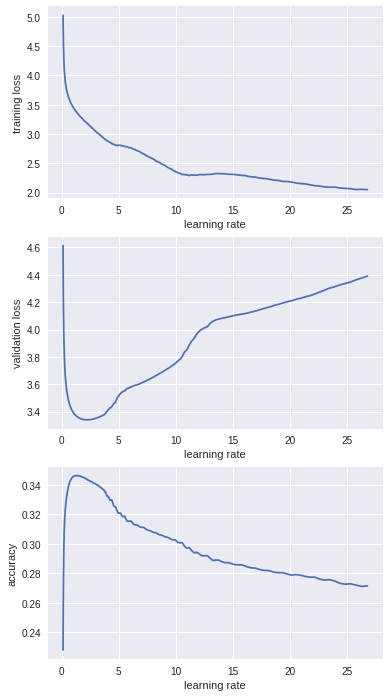

In [0]:
##visualizamos para seleccionar un adecuado learning rate
learn.sched.plot()

In [0]:
lr=10
lrs = lr

In [0]:
learn.clip=0.12

In [0]:
 learn.fit(lr, 1, cycle_len=10, use_clr_beta=(10,33,0.95,0.85), best_save_name='lm1_wgts')

epoch      trn_loss   val_loss   accuracy   
    0      4.867521   3.985148   0.288731  
    1      4.342347   3.72644    0.302574  
    2      4.053111   3.630183   0.310488  
    3      3.846965   3.583713   0.3126    
    4      3.686786   3.554479   0.321234  
    5      3.548022   3.540531   0.320821  
    6      3.424951   3.55144    0.319697  
    7      3.343349   3.54878    0.319936  
    8      3.270808   3.54235    0.321856  
    9      3.22555    3.542369   0.32246   



[array([3.54237]), 0.32245980699857074]

In [0]:
learn.load('lm1_wgts')
learn.save_encoder('lm1_enc')

## Classifier tokens

In [0]:
chunksize=24000

re1 = re.compile(r'  +')

In [0]:
df_trn = pd.read_csv(PREPROCESED_DATASET_FOLDER/'train.csv', header=None, chunksize=chunksize)
df_dev = pd.read_csv(PREPROCESED_DATASET_FOLDER/'dev.csv', header=None, chunksize=chunksize)
df_test = pd.read_csv(PREPROCESED_DATASET_FOLDER/'test.csv', header=None, chunksize=chunksize)

In [207]:
PREPROCESED_DATASET_FOLDER

PosixPath('/content/drive/My Drive/paper2_data/pre_processed_dataset')

In [0]:
# df_test = pd.read_csv(PREPROCESED_DATASET_FOLDER/'test.csv', header=None)
# df_test.head()

In [0]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_dev, dev_labels = get_all(df_dev, 1)


In [0]:
tok_tst, tst_labels = get_all(df_test, 1)

In [0]:
tst_labels



In [0]:
trn_labels

In [0]:
CLAS_PATH = PREPROCESED_DATASET_FOLDER
(CLAS_PATH/'tmp').mkdir(exist_ok=True)

In [0]:
np.save(CLAS_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(CLAS_PATH/'tmp'/'tok_dev.npy', tok_dev)
np.save(CLAS_PATH/'tmp'/'tok_tst.npy', tok_tst)

In [0]:
np.save(CLAS_PATH/'tmp'/'trn_labels.npy', trn_labels)
np.save(CLAS_PATH/'tmp'/'dev_labels.npy', dev_labels)
np.save(CLAS_PATH/'tmp'/'tst_labels.npy', tst_labels)

In [0]:
tok_trn = np.load(CLAS_PATH/'tmp'/'tok_trn.npy')
tok_dev = np.load(CLAS_PATH/'tmp'/'tok_dev.npy')
tok_tst = np.load(CLAS_PATH/'tmp'/'tok_tst.npy')

In [73]:
itos = pickle.load((TASSLM_PATH/'tmp'/'itos.pkl').open('rb'))
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

3654

In [0]:
trn_clas = np.array([[stoi[o] for o in p] for p in tok_trn])
dev_clas = np.array([[stoi[o] for o in p] for p in tok_dev])
tst_clas = np.array([[stoi[o] for o in p] for p in tok_tst])

In [0]:
np.save(CLAS_PATH/'tmp'/'trn_ids.npy', trn_clas)
np.save(CLAS_PATH/'tmp'/'dev_ids.npy', dev_clas)
np.save(CLAS_PATH/'tmp'/'tst_ids.npy', tst_clas)

## Classifier

Parameters here were obtained from imdb notebook from fastai

In [0]:
trn_clas = np.load(CLAS_PATH/'tmp'/'trn_ids.npy')
dev_clas = np.load(CLAS_PATH/'tmp'/'dev_ids.npy')

In [78]:
CLAS_PATH

PosixPath('/content/drive/My Drive/paper2_data/pre_processed_dataset')

In [0]:
trn_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'trn_labels.npy'))
dev_labels = np.squeeze(np.load(CLAS_PATH/'tmp'/'dev_labels.npy'))

In [0]:
bptt,em_sz,nh,nl = 70,400,1150,3
vs = len(itos)
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))
bs = 48
# bs = 28

In [0]:
min_lbl = trn_labels.min()
trn_labels -= min_lbl
dev_labels -= min_lbl
c=int(trn_labels.max())+1

In [0]:
# trn_clas[x]

In [0]:
trn_ds = TextDataset(trn_clas, trn_labels)
dev_ds = TextDataset(dev_clas, dev_labels)
##sampler for get ramdom minibatches automatically padded
trn_samp = SortishSampler(trn_clas, key=lambda x: len(trn_clas[x]), bs=bs//2)
dev_samp = SortSampler(dev_clas, key=lambda x: len(dev_clas[x]))
trn_dl = DataLoader(trn_ds, bs//2, transpose=True, num_workers=1, pad_idx=1, sampler=trn_samp)
dev_dl = DataLoader(dev_ds, bs, transpose=True, num_workers=1, pad_idx=1, sampler=dev_samp)
md = ModelData(TASSLM_PATH, trn_dl, dev_dl)

In [0]:
#dropouts
dps = np.array([0.4,0.5,0.05,0.3,0.4])*0.8

In [0]:
m = get_rnn_classifer(bptt, 20*70, c, vs, emb_sz=em_sz, n_hid=nh, n_layers=nl, pad_token=1,
          layers=[em_sz*3, 50, c], drops=[dps[4], 0.1],
          dropouti=dps[0], wdrop=dps[1], dropoute=dps[2], dropouth=dps[3])

In [0]:
opt_fn = partial(optim.Adam, betas=(0.7, 0.99))

In [0]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=.12
learn.metrics = [accuracy]

In [0]:
lr=3e-3
lrm = 2.6
lrs = np.array([lr/(lrm**4), lr/(lrm**3), lr/(lrm**2), lr/lrm, lr])

In [0]:
lrs=np.array([1e-4,1e-4,1e-4,1e-3,1e-2])

In [0]:
wd = 1e-7
learn.load_encoder('lm1_enc')

In [0]:
learn.freeze_to(-1)

In [0]:
# !python
# 

 57%|█████▋    | 108/191 [00:10<00:08, 10.25it/s, loss=2.9] 

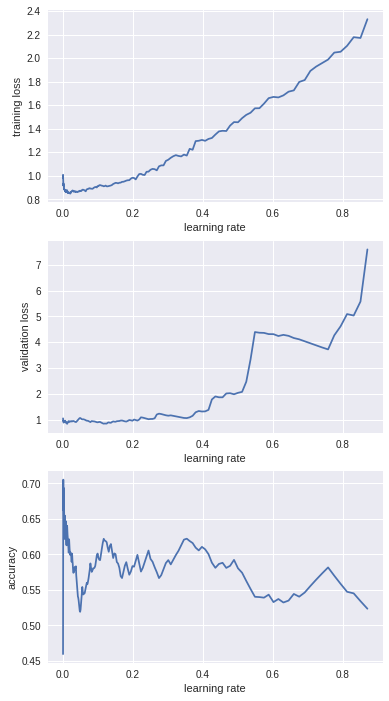

In [0]:
learn.lr_find2(start_lr=1e-3,end_lr=1, num_it=300)
learn.sched.plot()

In [0]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr_beta=(32,10,0.8,0.7))

epoch      trn_loss   val_loss   accuracy   
    0      0.83522    0.936131   0.488631  


[array([0.93613]), 0.48863094849245886]

In [0]:
learn.save('clas2_0')

In [0]:
learn.load('clas2_0')

In [0]:
learn.freeze_to(-2)

In [0]:
learn.fit(lrs, 1, wds=wd, cycle_len=1, use_clr_beta=(32,10,0.8,0.7))

epoch      trn_loss   val_loss   accuracy   
    0      0.804937   0.921395   0.498988  


[array([0.92139]), 0.4989880951813289]

In [0]:
learn.save('clas2_1')

In [0]:
learn.load('clas2_1')

In [0]:
learn.unfreeze()

In [0]:
learn.fit(lr, 1, cycle_len=5, use_clr_beta=(32,10,0.8,0.7), best_save_name='clas2')

epoch      trn_loss   val_loss   accuracy   
    0      0.777672   0.967557   0.505536  
    1      0.733121   1.025207   0.505952  
    2      0.689805   1.092805   0.507083  
    3      0.598593   1.31769    0.525     
    4      0.51713    1.204038   0.549762  


[array([1.20404]), 0.5497619091612952]

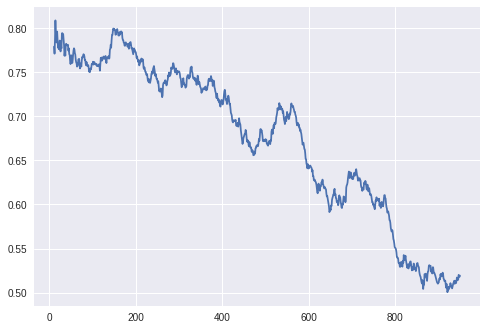

In [0]:
learn.sched.plot_loss()

## Check F1 score

cargar modelo con pesos y parametros

In [0]:
learn = RNN_Learner(md, TextModel(to_gpu(m)), opt_fn=opt_fn)
learn.reg_fn = partial(seq2seq_reg, alpha=2, beta=1)
learn.clip=.12
learn.metrics = [accuracy]

Hacer predicciones

In [91]:
# load test set tokens
tok_tst= np.load(CLAS_PATH/'tmp'/'tok_tst.npy')

# load classification model weights
learn.load('clas2')
m = learn.model

# set batch size to 1
m[0].bs=1

i = 0
results = []
while i < len(tok_tst):
    sen = ' '.join(tok_tst[i])
    i+=1
    m.eval()
    # reset hidden state
    m.reset()
#     dev_lm = np.array([[stoi[o] for o in p] for p in tok_dev])
    idxs = np.array([[stoi[p] for p in sen.strip().split(" ")]])
    idxs = np.transpose(idxs)
    # get predictions from model
    p = m(VV(idxs))
    print(sen + ': ' + str(to_np(torch.topk(p[0],1)[1])[0]))
    # append classification to list of results for validation
    results.append(torch.topk(p[0],1)[1].data.tolist()[0])


 xbos user_ref 1000 / 10 de verdad a ti que voy a decir petarda que te quiero más que a mí mismo ✨: [0]

 xbos user_ref user_ref user_ref las tengo pero aún no las he leído . caerán prontito: [2]

 xbos al final han sido 3h bueno , mañana tengo fiesta así que .. no me quejo: [0]

 xbos user_ref yo no tengo tiempo para esas cosas ahora mismo: [0]

 xbos user_ref ves ese brillo ? es un coso que hace que se sepan a kk: [1]

 xbos tengo una perrina adorable ... sabéis que me acompaña hasta la a habitación cuando me voy a dormir ?: [2]

 xbos user_ref es que en el ojeando el año pasado tampoco , tiene muchas canciones ya risa_ja jajajajaja: [0]

 xbos user_ref y el caminante ante el mar de niebla , uno de mis cuadros favoritos en portada: [0]

 xbos user_ref ¡ sí ! y me ha encantado ¿ tú ya las visto ? ¿ cuándo comentamos ?: [0]

 xbos user_ref mejor si pones un link a la cuenta , me ha costado encontrarte ..: [0]

 xbos llevo despierto desde las int_string 8 porque un puto mosquito estaba

In [0]:
preds = np.asarray(results)

In [93]:
from sklearn.metrics import *
# f1 score for all three classes
f1_score(tst_labels, preds, average='macro')

0.4536980666392431

SOTA is: 0.562. Source: http://ceur-ws.org/Vol-1896/p0_overview_tass2017.pdf

In [0]:
real = np.array(tst_labels)

In [0]:
prediction = np.array(preds)

In [0]:
real = real.squeeze()
prediction = prediction.squeeze()

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(real, prediction)

0.545045045045045

**Preparing submit**

In [0]:
ynew = preds.squeeze().tolist()

In [297]:
!ls "/content/drive/My Drive/paper2_data/2018/results"

results.txt


In [286]:
cols = ['id','tweet','sentiment']
df_test_raw = pd.read_csv("/content/drive/My Drive/TFINAL_data/data/2018/intertass-ES-test.csv",header=None, names=cols)

N_TRAIN_EXAMPLES = df_test_raw.shape[0]
print('df_test df: ',df_test_raw.shape)
df_test_raw.head()

df_test df:  (1899, 3)


,id,tweet,sentiment
0,770567971701940224,@LonelySoad mientras que no te pillen la prime...,NaN
1,770503386789711872,@ceemeese ya era hora de volver al csgo y deja...,NaN
2,770502863017635840,@mireiaescribano justo cuando se terminan las ...,NaN
3,770599972102348800,@LuisMartinez22_ pensba q iba a hacer @wxplosi...,NaN
4,770599962216390656,"@Vic_Phantomhive Si lo encuentro, sin compañer...",NaN


In [0]:
dictionary = dict(zip(list(df_test_raw.id), ynew))
# dictionary

In [0]:
import csv
# {'P': 0, 'N': 1, 'NEU': 2, 'NONE': 3}
fieldnames = ('tweet_id', 'polarity')
with open("/content/drive/My Drive/paper2_data/2018/results/results.txt", 'w') as f:
    for key in dictionary.keys():
      value=''
      if dictionary[key]==0:
        value = 'P'
      if dictionary[key]==1:
        value = 'N'
      if dictionary[key]==2:
        value = 'NEU'
      if dictionary[key]==3:
        value = 'NONE'
      
      f.write("%s\t%s\n"%(key,value))